# Example 10.1: Ideal Rankine Cycle

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet pressure of 3 MPa, a condenser pressure of 15 kPa, and no superheat in the boiler.  For reversible work devices and $\dot{W}_\text{Net}=1\ \mathrm{MW}$ Find:
* (a) Mass flow rate of steam (kg/s)
* (b) Boiler heat transfer (MW)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

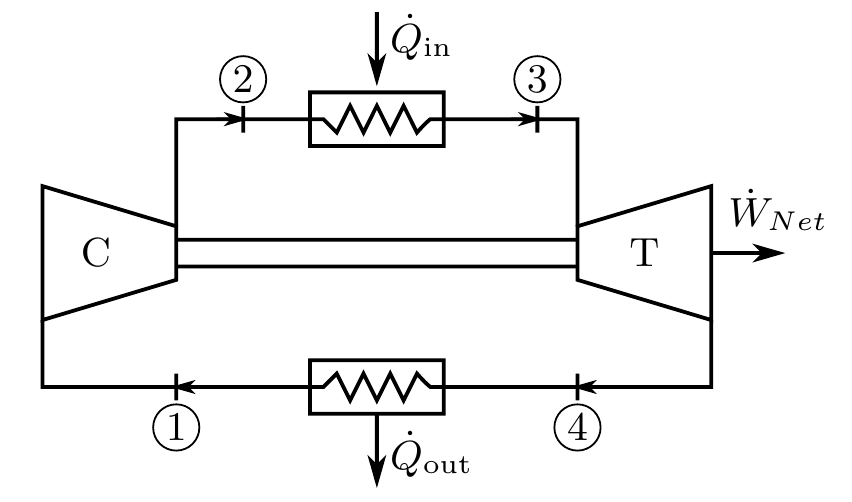

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
   
water = realfluid.Properties('Water')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


### Given Parameters
We now define variables to hold our known values.

In [2]:
p[3] = Quantity(3,'MPa')         # Turbine inlet pressure
p[1] = p[4] = Quantity(15.0,'kPa') # condenser pressure
Wdot_net = Quantity(1,'MW')      # Net power 

display.Summary(locals());

<IPython.core.display.Latex object>

,p
unit,kPa
1,15.0
3,3000.0
4,15.0


### Assumptions
- Ideal work devices
- No superheat: saturated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[3] = 1      # No superheat
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger

display.Summary(locals());

<IPython.core.display.Latex object>

,p,x
unit,kPa,
1,15.0,0
2,3000.0,-
3,3000.0,1
4,15.0,-


In [4]:
states.fix(1,water)
display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,v,u,h,s,x,phase
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,
1,53.9693,15.0,0.00101404,225.929,225.944,0.754865,0,twophase
2,-,3000.0,-,-,-,-,-,-
3,-,3000.0,-,-,-,-,1,-
4,-,15.0,-,-,-,-,-,-


#### (a) Mass flow rate

In [10]:
#### State 1)
states.fix(1,water)

#### 1-2) Isentropic compression
s[2] = s[1]
# T[2] = water.T(p[2],s[2])
# h[2] = water.h(p[2],s[2])
states.fix(2,water)
w_1_to_2 = h[1]-h[2]

#### 2-3) Isobaric heat addition
# T[3] = water.T(p[3],x[3])
# h[3] = water.h(p[3],x[3])
# s[3] = water.s(p[3],x[3])
states.fix(3,water)

#### 3-4) Isentropic expansion
s[4] = s[3]
# T[4]= water.T(p[4],s[4])
# h[4] = water.h(p[4],s[4])
# x[4] = water.x(p[4],s[4])
states.fix(4,water)
w_3_to_4 = h[3]-h[4]

#### Mass flow rate
w_net = w_1_to_2 + w_3_to_4
mdot = Wdot_net/w_net
mdot = mdot.to('kg/s') # hide

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,v,u,h,s,x,phase
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,
1,53.969313,15.0,0.001014,225.929071,225.944282,0.754865,0,twophase
2,54.084027,3000.0,0.001013,225.930994,228.969291,0.754865,-,liquid
3,233.853107,3000.0,0.066664,2603.160012,2803.153097,6.185583,1,twophase
4,53.969313,15.0,7.503663,1889.882282,2002.437223,6.185583,0.748836,twophase


#### (b) Boiler heat transfer (MW)

In [12]:
#### Boiler First Law
q_2_to_3 = h[3]-h[2]
Qdot_in = mdot*q_2_to_3

display.Calculations(locals());

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) Thermal efficiency

In [7]:
eta_th = Wdot_net/Qdot_in
eta_th = eta_th.to('') # hide

display.Calculations(locals());

<IPython.core.display.Latex object>

#### (d) Diagrams

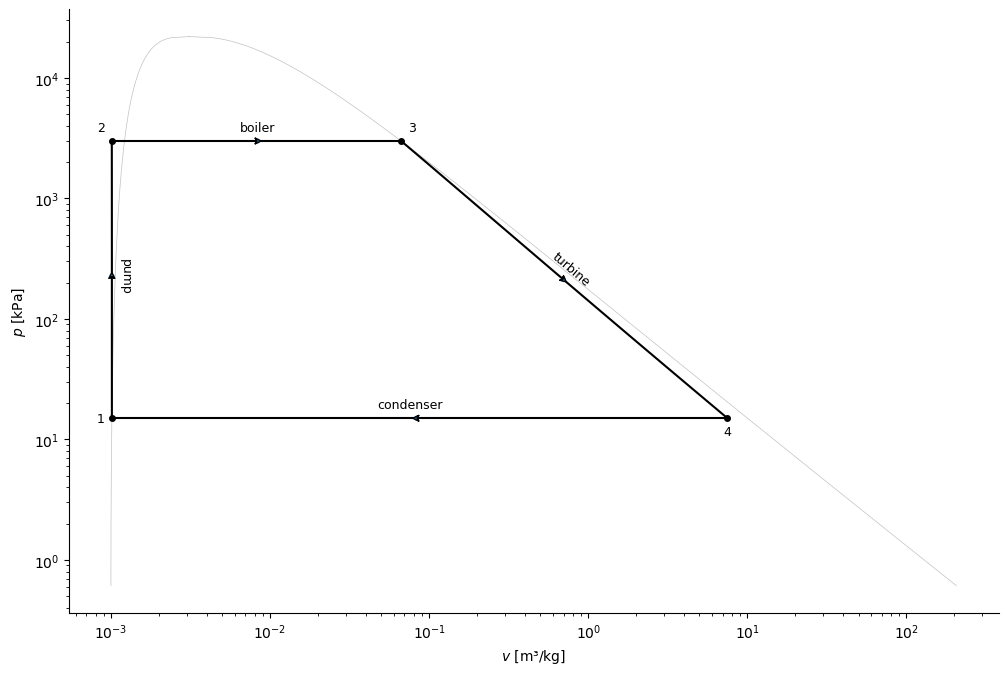

In [8]:
pv = water.pv_diagram()

for state in [1,2,3,4]:
    v[state] = water.v(p[state],h=h[state])

pv.plot_state(states[1],label_loc='west')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='north east')
pv.plot_state(states[4],label_loc='south')

pv.plot_process(states[1],states[2],path='isentropic',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='isentropic',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric',label='condenser');

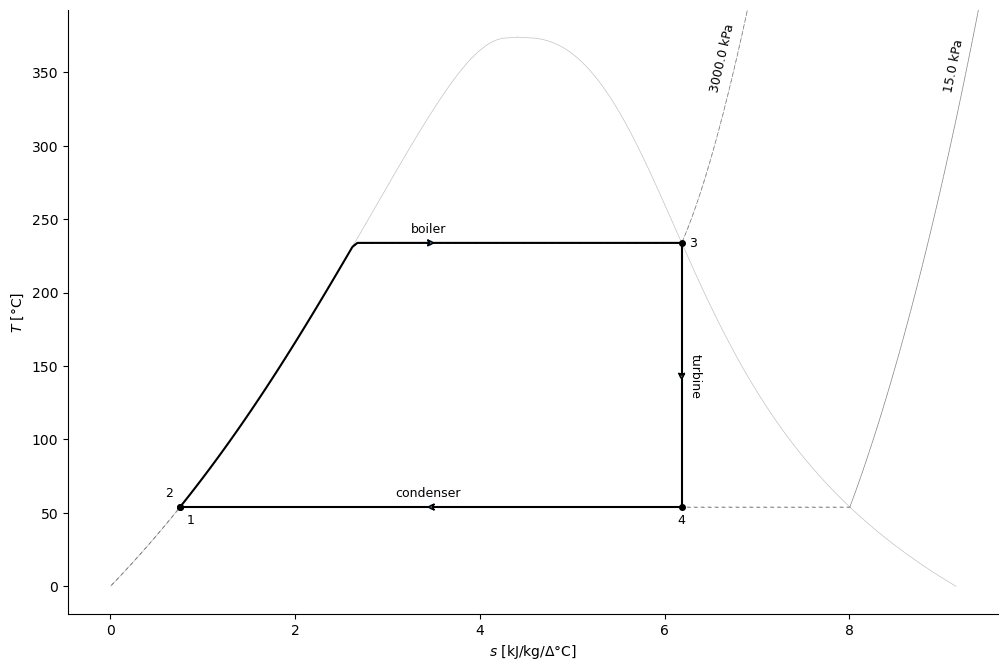

In [9]:
Ts = water.Ts_diagram()
Ts.plot_isobar(p[3],label=f'{p[3]}',pos=.9)
Ts.plot_isobar(p[4],label=f'{p[4]}',pos=.9)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='south')
    
Ts.plot_process(states[1],states[2],path='isentropic',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='isentropic',label='turbine')
Ts.plot_process(states[4],states[1],path='isobaric',label='condenser');